In [ ]:
from keras import datasets, utils, layers, models, optimizers
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [ ]:
(xtrain, ytrain), (xtest, ytest) = datasets.mnist.load_data()
xtrain = xtrain.reshape(60000, 784) / 255
Xtrain = xtrain[0:10000]
xtest = xtest.reshape(10000, 784) / 255
Xtest = xtest[0:10]


def convertiontobinary(size, data):
  asciivalues = []
  for i in range(size):
    ascii = np.binary_repr(int(data[i]+48), width=6)
    asciivalues.append(list(ascii))
  asciivalues = [list(map(int, i)) for i in asciivalues]
  asciivalues = np.array(asciivalues)
  return asciivalues


ytrain = ytrain.reshape(60000, 1)
Ytrain = convertiontobinary(ytrain.shape[0], ytrain)
Ytrain = Ytrain[0:10000]
Ytest = convertiontobinary(ytest.shape[0], ytest)
Ytest = Ytest[0:10]

In [ ]:
def feedforward(X, wh1, wh2, wo):
  h1=1/(1+ np.exp((-(X.dot(wh1.T)))))
  h2=1/(1+ np.exp((-(h1.dot(wh2.T)))))
  y = 1 / (1 + np.exp(-(h2.dot(wo.T))))
  return h1, h2, y

In [ ]:
def NNtest(X, Y, wh1, wh2, wo):
  h1, h2, y = feedforward(X, wh1, wh2, wo)
  testerror = np.sum((y - Y)**2)/Y.shape[0]
  return testerror

In [ ]:
def NNtrain(X, Y, Epoch):
  Ni = 784; Nh1 = 512 ; Nh2 = 256;
  No = 6;
  wh1 = np.random.rand(Nh1, Ni)
  wh2 = np.random.rand(Nh2, Nh1)
  wo = np.random.randn(No, Nh2)
  print(wo[1:10,:])
  dwh1 = np.zeros(wh1.shape)
  dwh2 = np.zeros(wh2.shape)
  dwo = np.zeros(wo.shape)
  # print(dwo.shape)
  trainerror = np.array([])
  testerror = np.array([])

  for trial in range(Epoch):
      print("epoch",trial)
      # h1=1/(1+ np.exp((-(X.dot(wh1.T)))))
      # h2=1/(1+ np.exp((-(h1.dot(wh2.T)))))
      # y = 1 / (1 + np.exp(-(h2.dot(wo.T))))
      h1, h2, y = feedforward(X, wh1, wh2, wo)
      # output for all pattern
      do = y * (1 - y) * (Y - y) # delta output
      dh2 = h2 * (1 - h2) * ((do).dot(wo))
      dh1 = h1 * (1 - h1) * ((dh2).dot(wh2))
      # update weights with momentum
      # print(do.shape)
      dwo = 0.9 * dwo + (do.T).dot(h2)
      dwh2 = 0.9*dwh2+(dh2.T).dot(h1)
      dwh1 = 0.9*dwh1+(dh1.T).dot(X)
    
      lr = 0.01
      # without any reqularization techniques
      # wo = wo + lr* dwo
      # wh1 = wh1+lr*dwh1
      # wh2 = wh2+lr*dwh2

      # #Ridge Regression
      lam = 0.01
      wo = (1-2*lam*lr)*wo + lr*dwo
      wh2 = (1-2*lam*lr)*wh2 + lr*dwh2
      wh1 = (1-2*lam*lr)*wh1 + lr*dwh1

      #LASSO REGRESSION
      # lam = 0.02
      # wo = wo-(2*lam*lr*np.sign(wo)) + lr*dwo
      # wh2 = wh2-(2*lam*lr*np.sign(wh2)) + lr*dwh2      
      # wh1 = wh1-(2*lam*lr*np.sign(wh1)) + lr*dwh1


      print("train error for epoch", trial,"is", (np.sum((y - Y)**2))/y.shape[0])
      trainerror = np.append(trainerror, (np.sum((y - Y)**2))/y.shape[0])
      error =  NNtest(Xtest, Ytest, wh1, wh2, wo)
      print("test error for epoch", trial,"is", error)
      testerror = np.append(testerror, error) 
  return trainerror, testerror

[[ 1.52307451  0.58151836 -1.138819   ...  1.146806    1.07417442
  -0.68424434]
 [-0.45086381  0.52416883 -1.39001999 ... -0.16847227  1.69168956
   1.14192623]
 [-0.07424275 -0.21815835  1.31322107 ... -0.9166704   0.62829203
  -0.84351253]
 [-0.51976948 -1.37564515 -0.73323283 ... -1.67062828 -1.20280596
   0.00774666]
 [-1.95543298  0.582978    0.55051561 ... -2.29988403  0.07997965
   1.35767455]]
epoch 0
train error for epoch 0 is 3.4882488018274502
test error for epoch 0 is 3.1832019819513073
epoch 1
train error for epoch 1 is 3.4718019380681193
test error for epoch 1 is 2.199770382481526
epoch 2
train error for epoch 2 is 2.4883703383637807
test error for epoch 2 is 2.1865441270881774
epoch 3
train error for epoch 3 is 2.4751440826950724
test error for epoch 3 is 1.199999793644109
epoch 4
train error for epoch 4 is 1.4885997489376859
test error for epoch 4 is 1.1999997919951912
epoch 5
train error for epoch 5 is 1.4885997469399002
test error for epoch 5 is 1.1999997901845911
ep

<function matplotlib.pyplot.show>

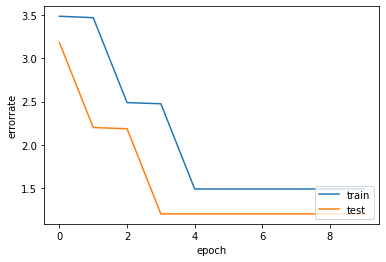

In [ ]:
trainerror, testerror  = NNtrain(Xtrain, Ytrain, 10)
# print(updatewo[1:10,:])
plt.plot(trainerror, label = 'train')
plt.plot(testerror, label = 'test')
plt.ylabel('errorrate')
plt.xlabel('epoch')
plt . legend (['train' , 'test'] , loc= 'lower right')
plt.show